In [8]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data=pd.read_csv("diabetes.csv")

In [14]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? we can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we simply replace it with their respective mean values.

In [21]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glicose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

#lets deal we outliears

<Axes: >

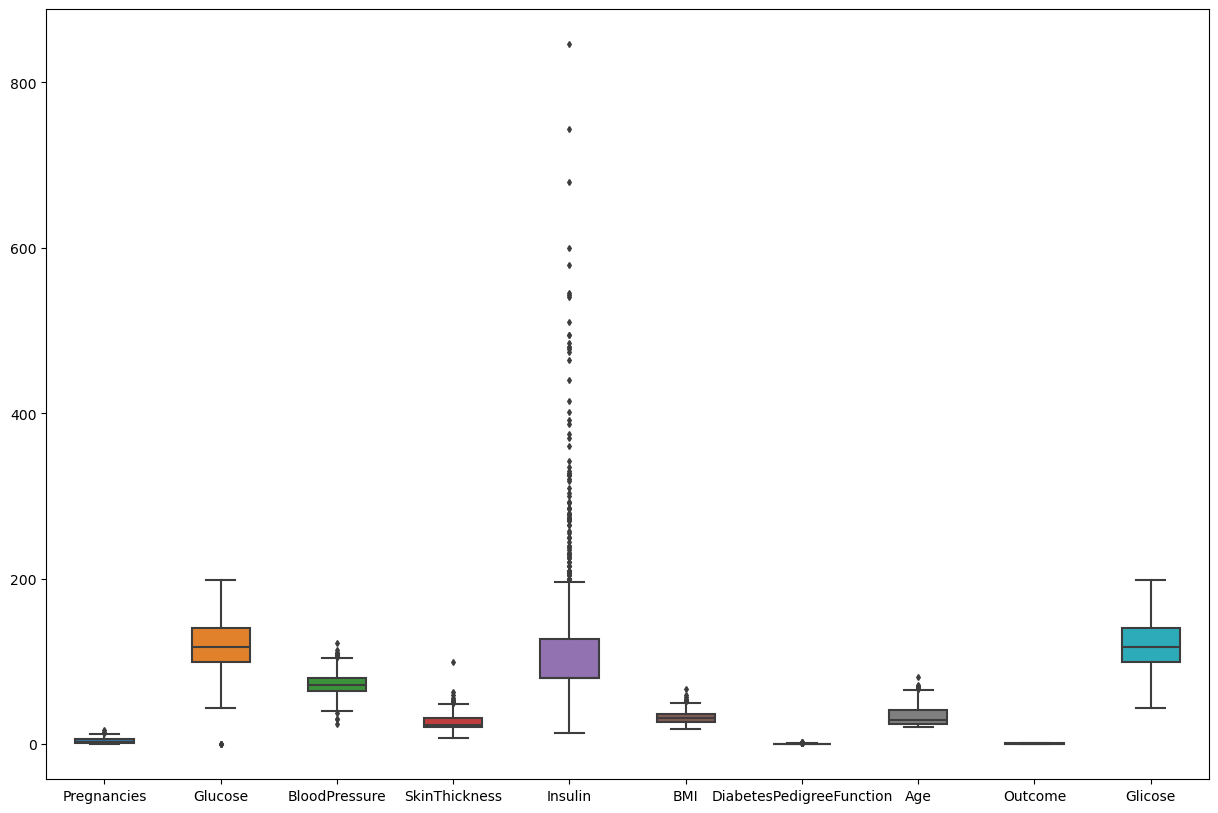

In [26]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width= 0.5,ax=ax,  fliersize=3)

In [28]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glicose
0,6,148,72.0,35.000000,79.799479,33.6,0.627,50,1,148.0
1,1,85,66.0,29.000000,79.799479,26.6,0.351,31,0,85.0
2,8,183,64.0,20.536458,79.799479,23.3,0.672,32,1,183.0
3,1,89,66.0,23.000000,94.000000,28.1,0.167,21,0,89.0
4,0,137,40.0,35.000000,168.000000,43.1,2.288,33,1,137.0


In [30]:
#segregate the dependent and independent variable
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [32]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((576, 9), (192, 9))

In [65]:
import pickle
##standard Scaling- Standardization
def scaler_standard(X_train, X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #saving the model
    file = open('model/standardScalar.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled, X_test_scaled

In [67]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [69]:
X_train_scaled

array([[ 1.50755225, -1.01521454, -0.89942504, ..., -0.98325882,
        -0.04863985, -1.09947934],
       [-0.82986389, -0.09964691, -1.23618124, ..., -0.62493647,
        -0.88246592, -0.1331471 ],
       [-1.12204091, -0.95207195,  0.61597784, ...,  0.39884168,
        -0.5489355 , -1.03283573],
       ...,
       [ 0.04666716, -0.85735805, -0.64685789, ..., -0.96519215,
        -1.04923114, -0.93287033],
       [ 2.09190629, -1.14149973,  0.11084355, ..., -0.5075031 ,
         0.11812536, -1.23276654],
       [ 0.33884418,  0.46863645,  0.78435594, ...,  0.51627505,
         2.953134  ,  0.46664532]])

In [71]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

## Hyperparameter Tuning
## GridSearch CV

In [74]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [80]:
logreg=LogisticRegression()
clf=GridSearchCV(logreg,param_grid=parameters,scoring='accuracy',cv=10)
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [82]:
clf.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [84]:
y_pred = clf.predict(X_test_scaled)

In [86]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[121,   9],
       [ 31,  31]], dtype=int64)

In [88]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [90]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7916666666666666

In [92]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9307692307692308

In [94]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7960526315789473

In [96]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8581560283687943

In [98]:
import pickle
file = open('model/modelForPrediction.pkl','wb')
pickle.dump(log_reg,file)
file.close()